In [5]:
import pandas as pd
import csv
import pathlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Reading the csv files
#grouping records and removing duplicates

original=pd.read_csv (r'C:\Desktop\Analysis Projects\Group1-Project1\Resources\Fitbit_apple_watch_data\aw_fb_data_fixed2.csv')

original.head()


,Item,Identifier,X1,age,gender,height,weight,steps,hear_rate,calories,...,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,origingender
0,1789,ID_1,1793,18,male,180.3,90.0,11.0,82.000000,0.344533,...,5.987703,79.0,1.000000,3.000000,0.024390,23.174478,0.105270,apple watch,Lying,1
1,1790,ID_1,1794,18,male,180.3,90.0,108.0,86.535900,3.287625,...,5.987703,79.0,1.000000,7.535900,0.061267,21.234162,6.301476,apple watch,Lying,1
2,1791,ID_1,1795,18,male,180.3,90.0,205.0,84.062067,20.663000,...,5.987703,79.0,1.000000,5.062067,0.041155,17.660075,21.960420,apple watch,Lying,1
3,1792,ID_1,1796,18,male,180.3,90.0,302.0,81.588233,19.335867,...,5.987703,79.0,1.000000,2.588233,0.021043,11.102437,47.082102,apple watch,Lying,1
4,1793,ID_1,1797,18,male,180.3,90.0,399.0,79.114400,18.008733,...,5.987703,79.0,-0.413641,0.114400,0.000930,2.154097,81.666522,apple watch,Lying,1


In [7]:
#List of the original file columns
original.columns

Index(['Item', 'Identifier', 'X1', 'age', 'gender', 'height', 'weight',
       'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart',
       'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart',
       'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device',
       'activity', 'origingender'],
      dtype='object')

In [8]:
#Count of the original records
original.count()

Item                    6264
Identifier              6264
X1                      6264
age                     6264
gender                  6264
height                  6264
weight                  6264
steps                   6264
hear_rate               6264
calories                6264
distance                6264
entropy_heart           6264
entropy_setps           6264
resting_heart           6264
corr_heart_steps        6264
norm_heart              6264
intensity_karvonen      6264
sd_norm_heart           6264
steps_times_distance    6264
device                  6264
activity                6264
origingender            6264
dtype: int64

In [9]:
#Reducing columns of data; Removed the following columns: 'Item,'entropy_heart', 'entropy_setps','resting_heart', 'corr_heart_steps', 'intensity_karvonen',
#'sd_norm_heart', 'steps_times_distance'.

reduce_df = original[['X1','Identifier', 'age', 'gender', 'height', 'weight',
       'steps', 'hear_rate', 'calories', 'distance', 'resting_heart', 'norm_heart',  'device', 'activity']]
reduce_df.columns



Index(['X1', 'Identifier', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'resting_heart', 'norm_heart',
       'device', 'activity'],
      dtype='object')

In [10]:
#Rename/correct column 'hear_rate' to 'heart_rate'
reduce_df = reduce_df.rename(columns={"hear_rate":"heart_rate"})
reduce_df.head()


,X1,Identifier,age,gender,height,weight,steps,heart_rate,calories,distance,resting_heart,norm_heart,device,activity
0,1793,ID_1,18,male,180.3,90.0,11.0,82.000000,0.344533,0.009570,79.0,3.000000,apple watch,Lying
1,1794,ID_1,18,male,180.3,90.0,108.0,86.535900,3.287625,0.058347,79.0,7.535900,apple watch,Lying
2,1795,ID_1,18,male,180.3,90.0,205.0,84.062067,20.663000,0.107124,79.0,5.062067,apple watch,Lying
3,1796,ID_1,18,male,180.3,90.0,302.0,81.588233,19.335867,0.155901,79.0,2.588233,apple watch,Lying
4,1797,ID_1,18,male,180.3,90.0,399.0,79.114400,18.008733,0.204678,79.0,0.114400,apple watch,Lying


In [11]:
#Showing basic statistics on the dataframe
reduce_df.describe()

,X1,age,height,weight,steps,heart_rate,calories,distance,resting_heart,norm_heart
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,1771.144317,29.158525,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,65.869938,20.272393
std,1097.988748,8.908978,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,21.203017,28.388116
min,1.000000,18.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,3.000000,-76.000000
25%,789.750000,23.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,58.134333,1.148883
50%,1720.000000,28.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,75.000000,9.820254
75%,2759.250000,33.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,76.138701,27.077336
max,3670.000000,56.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,155.000000,156.319444


In [12]:
#Count of unique identifiers
participants = reduce_df['Identifier'].value_counts()

ID_count = len(reduce_df['Identifier'].unique())
print(participants)

print(ID_count)

ID_25    178
ID_23    170
ID_40    162
ID_5     158
ID_4     156
ID_18    156
ID_15    156
ID_11    156
ID_22    154
ID_32    154
ID_24    154
ID_48    152
ID_37    152
ID_7     152
ID_14    148
ID_38    148
ID_16    146
ID_29    146
ID_27    146
ID_35    144
ID_39    144
ID_42    144
ID_36    144
ID_49    144
ID_19    144
ID_28    142
ID_6     140
ID_3     138
ID_2     137
ID_31    135
ID_26    135
ID_9     133
ID_21    109
ID_41    105
ID_13    105
ID_47     94
ID_10     94
ID_46     88
ID_8      87
ID_44     84
ID_12     83
ID_20     83
ID_17     82
ID_1      82
ID_43     81
ID_45     81
ID_33     81
ID_30     80
ID_34     77
Name: Identifier, dtype: int64
49


In [13]:
#Order the  Identifier column
orderid = reduce_df.sort_values('Identifier')
orderid

,X1,Identifier,age,gender,height,weight,steps,heart_rate,calories,distance,resting_heart,norm_heart,device,activity
0,1793,ID_1,18,male,180.3,90.0,11.000000,82.000000,0.344533,0.009570,79.000000,3.000000,apple watch,Lying
59,1852,ID_1,18,male,180.3,90.0,285.571429,96.857143,0.380000,0.064495,79.000000,17.857143,apple watch,Sitting
58,1851,ID_1,18,male,180.3,90.0,351.857143,103.333333,0.508667,0.058682,79.000000,24.333333,apple watch,Sitting
57,1850,ID_1,18,male,180.3,90.0,418.142857,104.454545,0.640500,0.052870,79.000000,25.454545,apple watch,Sitting
56,1849,ID_1,18,male,180.3,90.0,484.428571,119.750000,0.579500,0.047058,79.000000,40.750000,apple watch,Sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2730,ID_9,22,female,168.0,62.0,663.750000,56.466667,12.105875,0.435883,56.200000,0.266667,apple watch,Running 3 METs
1084,2729,ID_9,22,female,168.0,62.0,850.000000,56.400000,13.412750,0.557260,56.200000,0.200000,apple watch,Running 3 METs
1083,2728,ID_9,22,female,168.0,62.0,849.200000,56.333333,14.719625,0.566728,56.200000,0.133333,apple watch,Running 3 METs
1098,2743,ID_9,22,female,168.0,62.0,125.000000,85.000000,0.756000,0.055760,56.200000,28.800000,apple watch,Running 5 METs


In [14]:
#Count of number of records
reduce_df.count()


X1               6264
Identifier       6264
age              6264
gender           6264
height           6264
weight           6264
steps            6264
heart_rate       6264
calories         6264
distance         6264
resting_heart    6264
norm_heart       6264
device           6264
activity         6264
dtype: int64

In [15]:
# Creating a new DataFrame without duplicates
new_reduce_df = reduce_df.drop_duplicates(subset=['Identifier', 'steps', 'heart_rate', 'calories', 'distance', 'norm_heart', 'resting_heart','device', 'activity'])

# Display the resulting dataframe
print(new_reduce_df)


        X1 Identifier  age gender  height  weight       steps  heart_rate  \
0     1793       ID_1   18   male   180.3    90.0   11.000000   82.000000   
1     1794       ID_1   18   male   180.3    90.0  108.000000   86.535900   
2     1795       ID_1   18   male   180.3    90.0  205.000000   84.062067   
3     1796       ID_1   18   male   180.3    90.0  302.000000   81.588233   
4     1797       ID_1   18   male   180.3    90.0  399.000000   79.114400   
...    ...        ...  ...    ...     ...     ...         ...         ...   
6259  2545      ID_49   56   male   164.0    62.0    1.678280   33.242772   
6260  2546      ID_49   56   male   164.0    62.0    1.542624   32.574217   
6261  2547      ID_49   56   male   164.0    62.0    1.406968   31.905663   
6262  2548      ID_49   56   male   164.0    62.0    1.271312   31.237109   
6263  2549      ID_49   56   male   164.0    62.0    1.135656   30.568554   

       calories  distance  resting_heart  norm_heart       device  \
0     

CREATING DATA FRAMES FOR EACH ACTIVITY AND CALCULATING HEART RATE MEANS BY DEVICE

In [16]:
# Create a new DataFrame with rows where the activity is "Running"
run7_df = new_reduce_df[new_reduce_df['activity'] == 'Running 7 METs']

# Display the new DataFrame
print('Activity: Running 7 METs')
print(run7_df)

Activity: Running 7 METs
        X1 Identifier  age gender  height  weight       steps  heart_rate  \
60    1853       ID_1   18   male   180.3    90.0  219.285714  114.085714   
61    1854       ID_1   18   male   180.3    90.0  153.000000  131.314286   
62    1855       ID_1   18   male   180.3    90.0  150.000000  148.542857   
63    1856       ID_1   18   male   180.3    90.0  145.000000  165.771429   
64    1857       ID_1   18   male   180.3    90.0  688.000000  183.000000   
...    ...        ...  ...    ...     ...     ...         ...         ...   
6259  2545      ID_49   56   male   164.0    62.0    1.678280   33.242772   
6260  2546      ID_49   56   male   164.0    62.0    1.542624   32.574217   
6261  2547      ID_49   56   male   164.0    62.0    1.406968   31.905663   
6262  2548      ID_49   56   male   164.0    62.0    1.271312   31.237109   
6263  2549      ID_49   56   male   164.0    62.0    1.135656   30.568554   

       calories  distance  resting_heart  norm_hea

Notes:  calculate means for each activity by device
grouped_device_df = new_reduce_df.groupby('device')

# Calculate the mean of 'norm_heart' and 'resting_heart' for each device
means_device_df = grouped_device_df.agg({
    'norm_heart': 'mean',
    'resting_heart': 'mean'
}).reset_index()

# Display the resulting DataFrame
print(means_device_df)

In [17]:
#Calculating heart rate means by activity = Running 7 METs
grouped_device_df = run7_df.groupby('device')

# Calculate the mean of 'norm_heart' and 'resting_heart' for each device
means_run7_df = grouped_device_df.agg({
    'norm_heart': 'mean',
    'resting_heart': 'mean'
}).reset_index()

# Display the resulting DataFrame
print('Means for Running 7 METs')
print(means_run7_df)





Means for Running 7 METs
        device  norm_heart  resting_heart
0  apple watch   45.141907      68.165660
1       fitbit   19.070995      59.255551


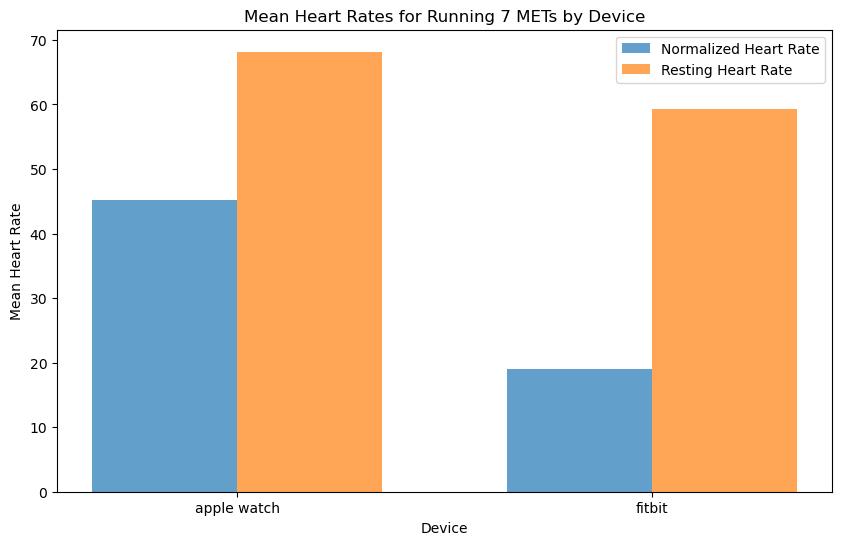

In [18]:
# Grouped bar chart for mean heart rates by device
bar_width = 0.35
index = np.arange(len(means_run7_df['device']))

plt.figure(figsize=(10, 6))
plt.bar(index, means_run7_df['norm_heart'], width=bar_width, label='Normalized Heart Rate', alpha=0.7)
plt.bar(index + bar_width, means_run7_df['resting_heart'], width=bar_width, label='Resting Heart Rate', alpha=0.7)

plt.xlabel('Device')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rates for Running 7 METs by Device')
plt.xticks(index + bar_width / 2, means_run7_df['device'])
plt.legend()
plt.show()

In [19]:
#Ttest
df_aw = run7_df[run7_df['device']=='apple watch']
df_fb = run7_df[run7_df['device']=='fitbit']

stats.ttest_ind(df_aw['resting_heart'], df_fb['resting_heart'], equal_var=False)



#There is no significant differences in the means reported for the resting heart rates between Apple Watch and Fitbit for the activity Running 7 METs.

Ttest_indResult(statistic=5.591492949210213, pvalue=3.473589188909155e-08)

In [20]:
# Create a new DataFrame with rows where the activity is "Running"
run5_df = new_reduce_df[new_reduce_df['activity'] == 'Running 5 METs']

# Display the new DataFrame
print ('Activity: Running 5 METs')
print(run5_df)

Activity: Running 5 METs
        X1 Identifier  age gender  height  weight       steps  heart_rate  \
43    1836       ID_1   18   male   180.3    90.0  588.714286   82.625000   
44    1837       ID_1   18   male   180.3    90.0  674.000000   89.250000   
45    1838       ID_1   18   male   180.3    90.0  106.000000   95.875000   
46    1839       ID_1   18   male   180.3    90.0  124.000000  102.500000   
47    1840       ID_1   18   male   180.3    90.0  128.000000  109.125000   
...    ...        ...  ...    ...     ...     ...         ...         ...   
6242  2528      ID_49   56   male   164.0    62.0    3.984433   44.608195   
6243  2529      ID_49   56   male   164.0    62.0    3.848777   43.939641   
6244  2530      ID_49   56   male   164.0    62.0    3.713121   43.271087   
6245  2531      ID_49   56   male   164.0    62.0    3.577465   42.602532   
6246  2532      ID_49   56   male   164.0    62.0    3.441809   41.933978   

      calories  distance  resting_heart  norm_hear

In [21]:
#Calculating heart rate means by activity = Running 5 METs
grouped_device_df = run5_df.groupby('device')

# Calculate the mean of 'norm_heart' and 'resting_heart' for each device
means_run5_df = grouped_device_df.agg({
    'norm_heart': 'mean',
    'resting_heart': 'mean'
}).reset_index()

# Display the resulting DataFrame
print('Means for Running 5 METs')
print(means_run5_df)

Means for Running 5 METs
        device  norm_heart  resting_heart
0  apple watch   29.763683      68.306276
1       fitbit   16.582629      63.575026


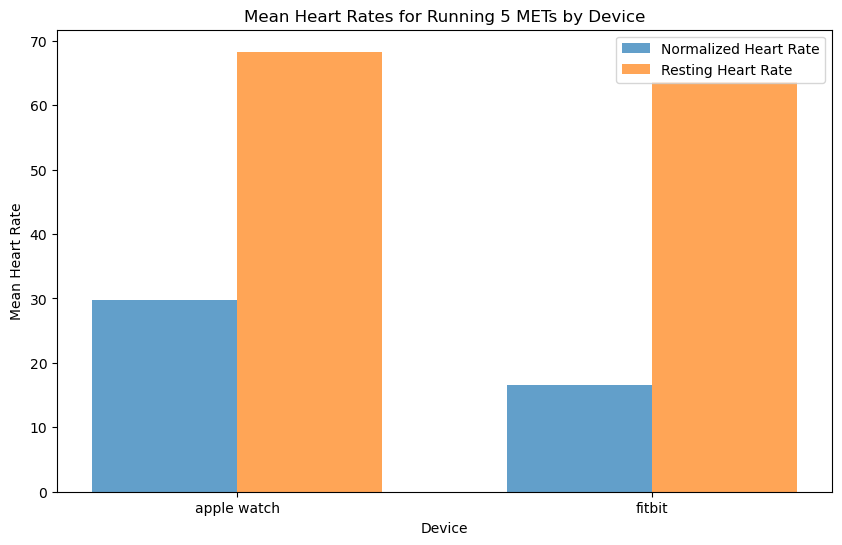

In [22]:
# Grouped bar chart for mean heart rates by device
bar_width = 0.35
index = np.arange(len(means_run5_df['device']))

plt.figure(figsize=(10, 6))
plt.bar(index, means_run5_df['norm_heart'], width=bar_width, label='Normalized Heart Rate', alpha=0.7)
plt.bar(index + bar_width, means_run5_df['resting_heart'], width=bar_width, label='Resting Heart Rate', alpha=0.7)

plt.xlabel('Device')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rates for Running 5 METs by Device')
plt.xticks(index + bar_width / 2, means_run5_df['device'])
plt.legend()
plt.show()

In [23]:
#Ttest
df_aw = run5_df[run5_df['device']=='apple watch']
df_fb = run5_df[run5_df['device']=='fitbit']


stats.ttest_ind(df_aw['resting_heart'], df_fb['resting_heart'], equal_var=False)

#There is no significant differences in the means reported for the resting heart rates between Apple Watch and Fitbit for the activity Running 5 METs.

Ttest_indResult(statistic=3.3536508636494204, pvalue=0.0008572713151761626)

In [24]:
# Create a new DataFrame with rows where the activity is "Running"
run3_df = new_reduce_df[new_reduce_df['activity'] == 'Running 3 METs']

# Display the new DataFrame
print('Activity for Running 3 METs')
print(run3_df)

Activity for Running 3 METs
        X1 Identifier  age gender  height  weight       steps  heart_rate  \
26    1819       ID_1   18   male   180.3    90.0   86.000000   87.000000   
27    1820       ID_1   18   male   180.3    90.0   97.000000   90.333333   
28    1821       ID_1   18   male   180.3    90.0   98.000000   93.666667   
29    1822       ID_1   18   male   180.3    90.0  101.000000   97.000000   
30    1823       ID_1   18   male   180.3    90.0  439.000000   95.454545   
...    ...        ...  ...    ...     ...     ...         ...         ...   
6225  2511      ID_49   56   male   164.0    62.0    6.290586   55.973619   
6226  2512      ID_49   56   male   164.0    62.0    6.154930   55.305065   
6227  2513      ID_49   56   male   164.0    62.0    6.019274   54.636510   
6228  2514      ID_49   56   male   164.0    62.0    5.883617   53.967956   
6229  2515      ID_49   56   male   164.0    62.0    5.747961   53.299402   

      calories  distance  resting_heart  norm_h

In [25]:
#Calculating heart rate means by activity = Running 3 METs
grouped_device_df = run3_df.groupby('device')

# Calculate the mean of 'norm_heart' and 'resting_heart' for each device
means_run3_df = grouped_device_df.agg({
    'norm_heart': 'mean',
    'resting_heart': 'mean'
}).reset_index()

# Display the resulting DataFrame
print('Means for Running 3 METs')
print(means_run3_df)

Means for Running 3 METs
        device  norm_heart  resting_heart
0  apple watch   18.282697      68.547402
1       fitbit   16.399828      66.146684


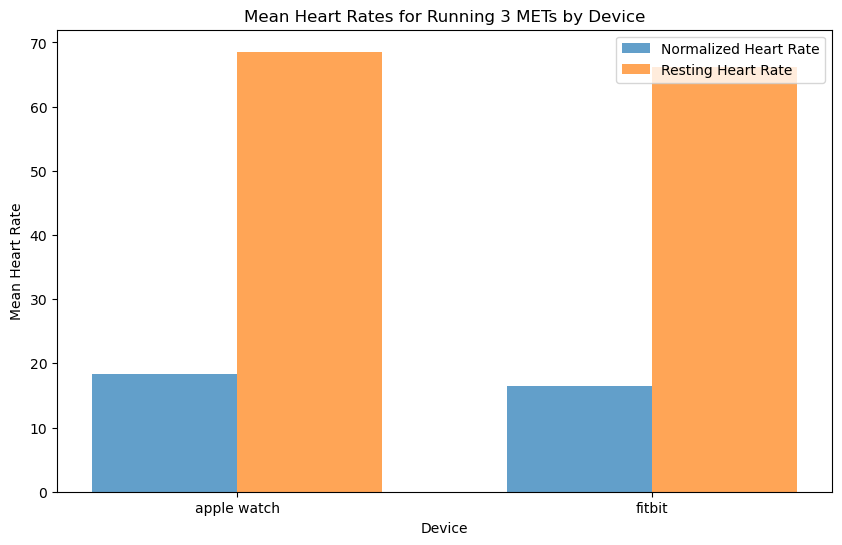

In [26]:
# Grouped bar chart for mean heart rates by device
bar_width = 0.35
index = np.arange(len(means_run3_df['device']))

plt.figure(figsize=(10, 6))
plt.bar(index, means_run3_df['norm_heart'], width=bar_width, label='Normalized Heart Rate', alpha=0.7)
plt.bar(index + bar_width, means_run3_df['resting_heart'], width=bar_width, label='Resting Heart Rate', alpha=0.7)

plt.xlabel('Device')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rates for Running 3 METs by Device')
plt.xticks(index + bar_width / 2, means_run3_df['device'])
plt.legend()
plt.show()

In [27]:
#Ttest
df_aw = run3_df[run3_df['device']=='apple watch']
df_fb = run3_df[run3_df['device']=='fitbit']


stats.ttest_ind(df_aw['resting_heart'], df_fb['resting_heart'], equal_var=False)



Ttest_indResult(statistic=1.6941740727669614, pvalue=0.09087616379978523)

Ttest_indResult(statistic=3.847763559787084, pvalue=0.00013644418747026964)

In [69]:
# Create a new DataFrame with rows where the activity is 'Walking"
walk_df = new_reduce_df[new_reduce_df['activity'] == 'Self Pace walk']

# Display the new DataFrame
print(walk_df)

        X1 Identifier  age gender  height  weight       steps  heart_rate  \
10    1803       ID_1   18   male   180.3    90.0  981.000000   83.000000   
11    1804       ID_1   18   male   180.3    90.0   91.000000   85.125000   
12    1805       ID_1   18   male   180.3    90.0   81.000000   87.250000   
13    1806       ID_1   18   male   180.3    90.0   89.000000   89.375000   
14    1807       ID_1   18   male   180.3    90.0   92.000000   91.500000   
...    ...        ...  ...    ...     ...     ...         ...         ...   
6208  2494      ID_49   56   male   164.0    62.0    8.596738   67.339043   
6209  2495      ID_49   56   male   164.0    62.0    8.461082   66.670488   
6210  2496      ID_49   56   male   164.0    62.0    8.325426   66.001934   
6211  2497      ID_49   56   male   164.0    62.0    8.189770   65.333380   
6212  2498      ID_49   56   male   164.0    62.0    8.054114   64.664825   

       calories   distance  resting_heart  norm_heart       device  \
10   

In [70]:
#Calculating heart rate means by activity = Self Pace walk
grouped_device_df = walk_df.groupby('device')

# Calculate the mean of 'norm_heart' and 'resting_heart' for each device
means_walk_df = grouped_device_df.agg({
    'norm_heart': 'mean',
    'resting_heart': 'mean'
}).reset_index()

# Display the resulting DataFrame
print('Means for Self Pace walk')
print(means_run3_df)

Means for Self Pace walk
        device  norm_heart  resting_heart
0  apple watch   18.282697      68.547402
1       fitbit   16.399828      66.146684


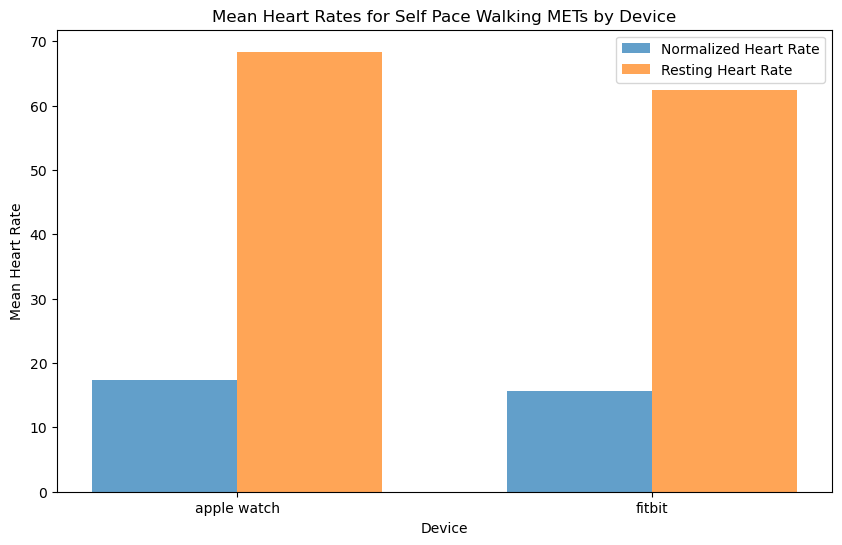

In [71]:
# Grouped bar chart for mean heart rates by device
bar_width = 0.35
index = np.arange(len(means_walk_df['device']))

plt.figure(figsize=(10, 6))
plt.bar(index, means_walk_df['norm_heart'], width=bar_width, label='Normalized Heart Rate', alpha=0.7)
plt.bar(index + bar_width, means_walk_df['resting_heart'], width=bar_width, label='Resting Heart Rate', alpha=0.7)

plt.xlabel('Device')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rates for Self Pace Walking METs by Device')
plt.xticks(index + bar_width / 2, means_walk_df['device'])
plt.legend()
plt.show()

In [ ]:
#Ttest
df_aw = walk_df[walk_df['device']=='apple watch']
df_fb = walk_df[walk_df['device']=='fitbit']


stats.ttest_ind(df_aw['resting_heart'], df_fb['resting_heart'], equal_var=False)

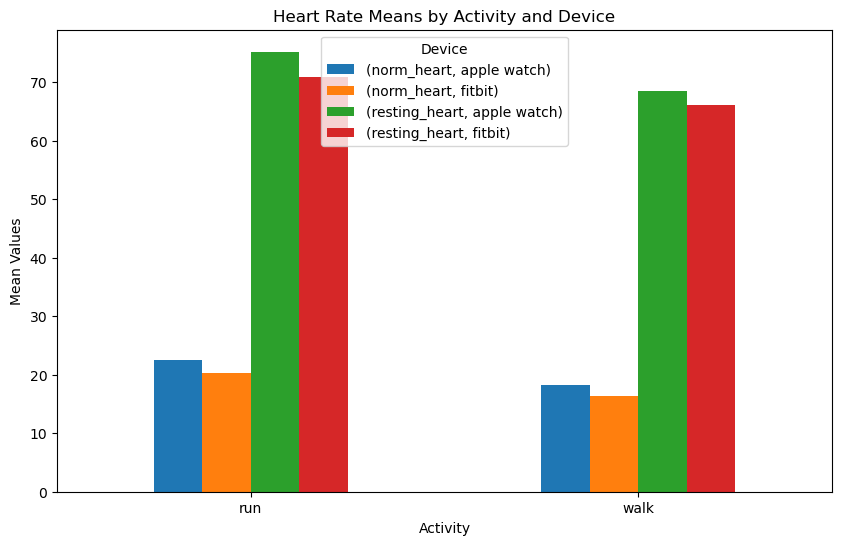

In [46]:
# Create a DataFrame with multiple activities, devices, and heart rate means
data = {
    'device': ['apple watch', 'fitbit', 'apple watch', 'fitbit'],
    'activity': ['walk', 'walk', 'run', 'run'],
    'norm_heart': [18.28, 16.40, 22.50, 20.30],
    'resting_heart': [68.55, 66.15, 75.20, 70.80]
}

df = pd.DataFrame(data)

# Plot a grouped bar chart
ax = df.pivot_table(index='activity', columns='device', values=['norm_heart', 'resting_heart'], aggfunc='mean').plot(kind='bar', figsize=(10, 6), rot=0)

# Set labels and title
ax.set_xlabel('Activity')
ax.set_ylabel('Mean Values')
ax.set_title('Heart Rate Means by Activity and Device')

# Display the plot
plt.legend(title='Device')
plt.show()